In [21]:
import os, glob, re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
glob.glob('logs/*')

['logs/D-DQN-H.txt',
 'logs/N-DQN.txt',
 'logs/D-DQN-S-E.txt',
 'logs/Duel-DQN-PER.txt',
 'logs/D-DQN-S.txt',
 'logs/Duel-DQN.txt']

In [13]:
data = pd.DataFrame(columns = ['episode','loss','experiment'])
for f in glob.glob('logs/*'):
    with open(f) as file:
        q = file.readlines()
        for line in q:
            episode = int(line.split(' ')[1].split('\t')[0])
            loss = float(line.split(' ')[3].split('\n')[0])
            data = data.append({'episode':episode, 'loss':loss, 'experiment':f.split('/')[1].split('.')[0]},ignore_index=True)
            

In [14]:
data

,episode,loss,experiment
0,10,0.30,D-DQN-H
1,20,0.75,D-DQN-H
2,30,1.70,D-DQN-H
3,40,2.40,D-DQN-H
4,50,2.78,D-DQN-H
...,...,...,...
538,970,15.66,Duel-DQN
539,980,15.60,Duel-DQN
540,990,15.84,Duel-DQN
541,1000,15.86,Duel-DQN


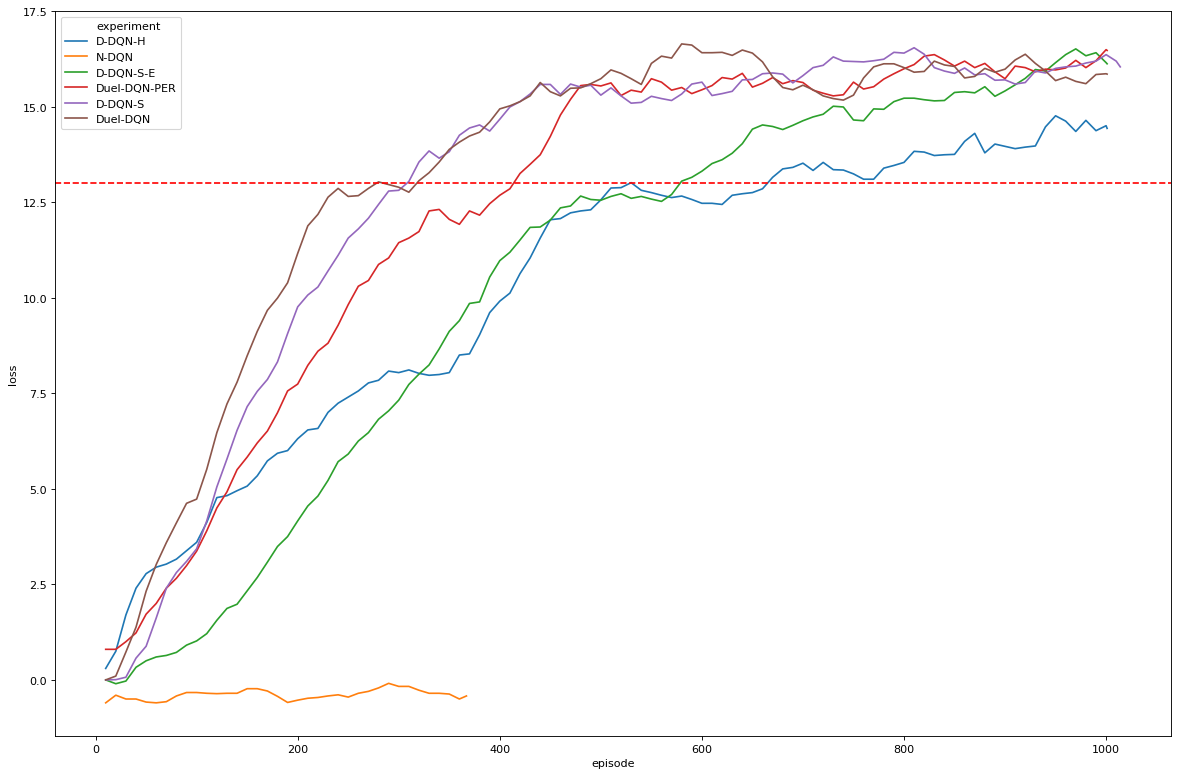

In [24]:
from matplotlib.pyplot import figure
fig = figure(num=None, figsize=(18, 12), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(x='episode', y ='loss', hue = 'experiment', data=data)
plt.axhline(y=13, color='r', linestyle='--')

In [26]:
fig.savefig('plot.png', dpi=fig.dpi)